In [64]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

first, a distribution is created using numpy

In [65]:
mean = 0
std_dev = 1

# our data
rng = np.random.default_rng()
data = rng.normal(mean, std_dev, 10000)

# for plotting the function
# because we are using a normal distribution, 99.99% of data 
# will fall within 4 std devs of the mean
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 10000)
# generates a probability distribution function (pdf)
# takes: values, mean, standard deviation
y = norm.pdf(x, mean, std_dev)

next, we plot our results using matplotlib

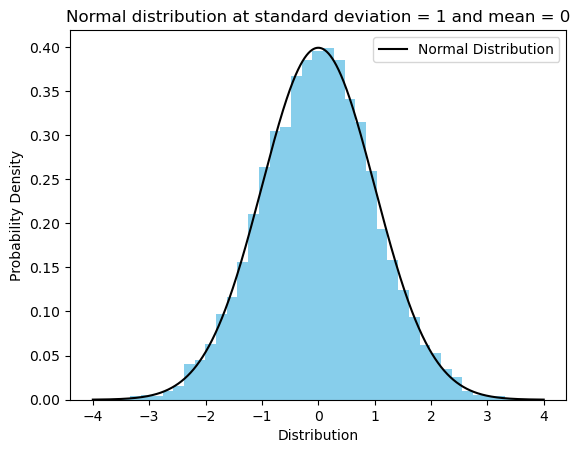

In [66]:
plt.hist(data, bins=40, color='skyblue', density=True)
plt.plot(x, y, label='Normal Distribution', color='black')

plt.xlabel('Distribution')
plt.ylabel('Probability Density')
plt.title('Normal distribution at standard deviation = 1 and mean = 0')
plt.legend()

plt.show()


interesting. can we create a better graph?

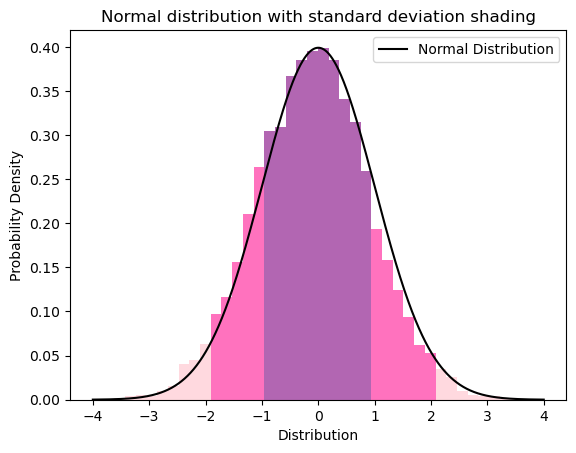

In [67]:
counts, bin_edges = np.histogram(data, bins=40, density=True)
colours = []
for i in range(len(bin_edges) - 1):
    if bin_edges[i] < mean - 2*std_dev:
        colours.append('pink')
    elif bin_edges[i] < mean - std_dev:
        colours.append('deeppink')
    elif bin_edges[i] < mean + std_dev:
        colours.append('purple')
    elif bin_edges[i] < mean + 2*std_dev:
        colours.append('deeppink')
    else:
        colours.append('pink')

fig, ax = plt.subplots()
for i in range(len(counts)):
    ax.bar(bin_edges[i], counts[i], width=bin_edges[i+1] - bin_edges[i], color=colours[i], alpha=0.6)

plt.plot(x, y, label='Normal Distribution', color='black')

plt.xlabel('Distribution')
plt.ylabel('Probability Density')
plt.title('Normal distribution with standard deviation shading')
plt.legend()

plt.show()


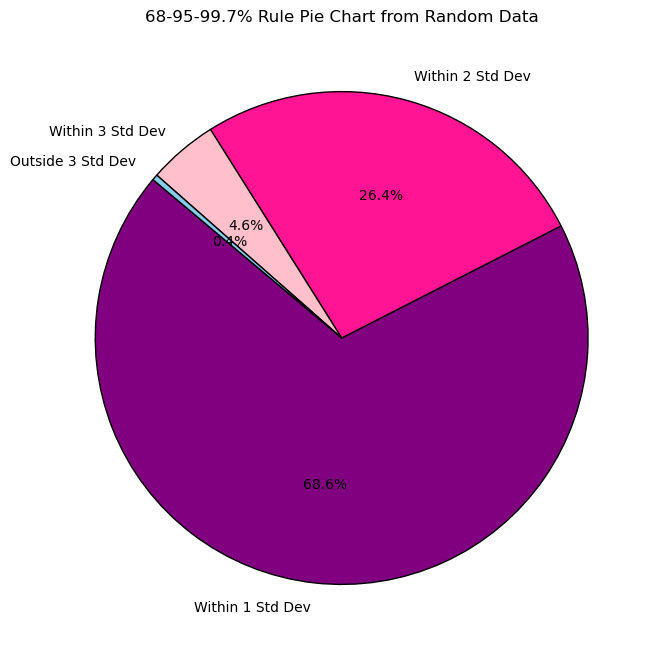

In [68]:
within_1_sd = np.sum((data >= mean - std_dev) & (data <= mean + std_dev)) / len(data)
within_2_sd = np.sum((data >= mean - 2*std_dev) & (data <= mean + 2*std_dev)) / len(data)
within_3_sd = np.sum((data >= mean - 3*std_dev) & (data <= mean + 3*std_dev)) / len(data)
outside_sd = 1 - within_3_sd

# Calculate the differences for the pie chart
within_2_sd -= within_1_sd
within_3_sd -= (within_1_sd + within_2_sd)

# Pie chart values and labels
values = [within_1_sd, within_2_sd, within_3_sd, outside_sd]
labels = ['Within 1 Std Dev', 'Within 2 Std Dev', 'Within 3 Std Dev', 'Outside 3 Std Dev']
colors = ['purple','deeppink','pink','skyblue']

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})

# Add a title
plt.title('68-95-99.7% Rule Pie Chart from Random Data')

# Show the plot
plt.show()